## AUTO ML REGRESSION MODEL WITH RAPIDS

In [11]:
# !pip install gdown
# !mkdir data
# !cd data
# !gdown 1XQScl-kSLrr2agvkoAZk1H32vHoLasCO
# !unzip csv_for_ml.zip

In [12]:
import pandas as pd
from functools import reduce

In [13]:
business = pd.read_csv('./data/business.csv')
attributes = pd.read_csv('./data/atributtes_clean.csv', low_memory=False)
categories = pd.read_csv('./data/categories_fixed.csv')
hours = pd.read_csv('./data/hours_fixed.csv')
gps = pd.read_csv('./data/gps_clustering.csv')
checkins = pd.read_csv('./data/n_checkins.csv')
top_tips = pd.read_csv('./data/top_tips.csv')
#target1 = pd.read_csv('./data/target.csv')
target2 = pd.read_csv('./data/target2.csv')
sentiment = pd.read_csv('./data/sentiment_ok_unique.csv')

In [14]:
data_frames = [business, attributes, categories, hours, gps, checkins, top_tips, target2]
full_data_2 = reduce(lambda left,right: pd.merge(left,right,on='business_id', how='left'), data_frames)

In [15]:
full_data_2.shape

(150346, 51)

In [16]:
full_data_2.columns

Index(['business_id', 'name', 'postal_code', 'latitude_x', 'longitude_x',
       'stars', 'review_count', 'is_open', 'good_ambience', 'garage',
       'BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'BikeParking',
       'WiFi', 'delivery', 'GoodForKids', 'OutdoorSeating',
       'RestaurantsReservations', 'HasTV', 'RestaurantsGoodForGroups',
       'Alcohol', 'ByAppointmentOnly', 'Caters', 'RestaurantsAttire',
       'NoiseLevel', 'meal_diversity', 'Restaurants', 'Food', 'Shopping',
       'Home Services', 'Beauty & Spas', 'Nightlife', 'Health & Medical',
       'Local Services', 'Bars', 'Automotive', 'total_categories', '7days',
       'weekends', 'n_open_days', 'mean_total_hours_open', 'mean_open_hour',
       'mean_close_hour', 'latitude_y', 'longitude_y', 'areas',
       'number_visits', 'number_tips', 'Unnamed: 0', 'success_score_2',
       'target'],
      dtype='object')

In [17]:
to_drop = ['name', 'postal_code', 'latitude_x', 'longitude_x', 'stars', 'review_count', 'is_open', 'latitude_y', 'longitude_y',  'number_visits', 'number_tips', 'Unnamed: 0', '7days', 'n_open_days', 'total_categories', 'mean_open_hour', 'mean_close_hour', 'target' ]
full_data_2.drop(to_drop, inplace=True, axis=1)

In [18]:
full_data_2 = full_data_2.loc[full_data_2['areas'] != 7, :]

/tmp/ipykernel_32/1225277708.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(full_data_2.corr(method='spearman'), annot=True, fmt='.1g', cmap='coolwarm')


<AxesSubplot: >

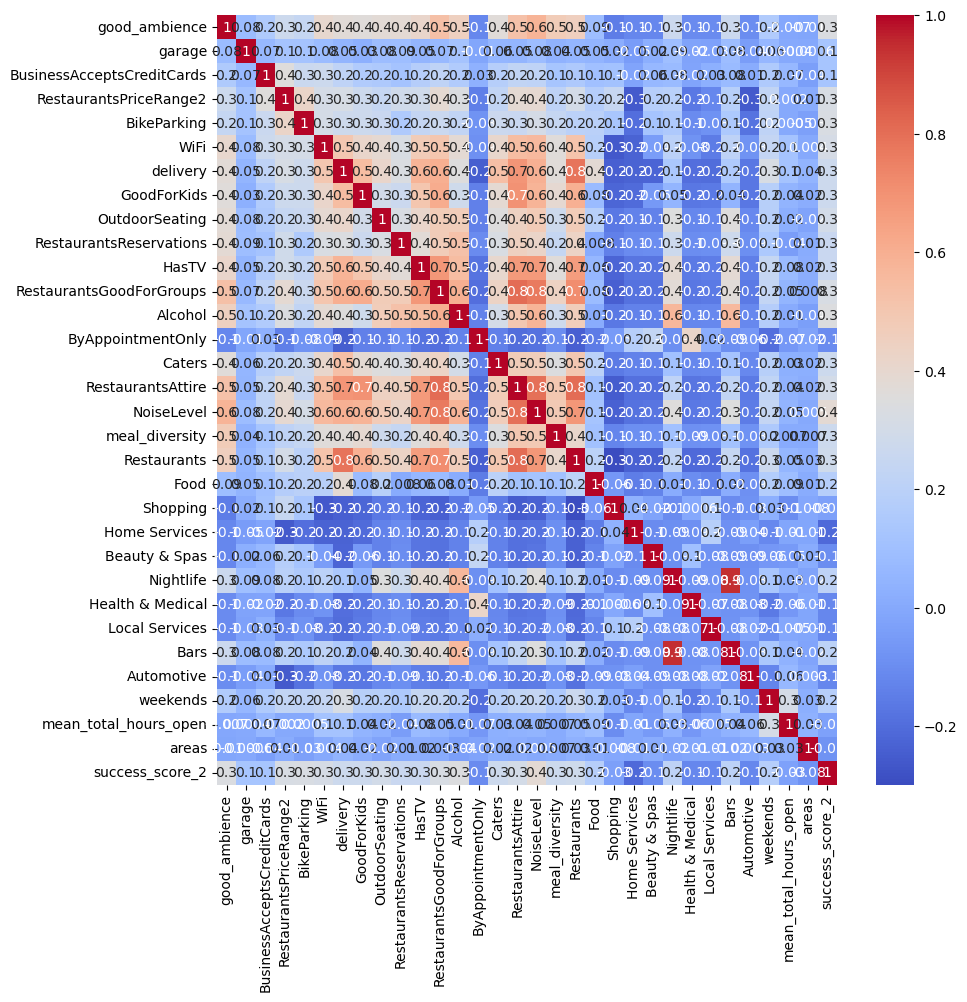

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(full_data_2.corr(method='spearman'), annot=True, fmt='.1g', cmap='coolwarm')

In [20]:
full_data_2.index = full_data_2['business_id']
full_data_2.drop('business_id', axis=1, inplace=True)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.utils import class_weight

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

#from functions import run_exps

import warnings
warnings.filterwarnings('ignore') 

In [22]:
full_data_2.isna().sum()

good_ambience                     0
garage                            0
BusinessAcceptsCreditCards        0
RestaurantsPriceRange2            0
BikeParking                       0
WiFi                              0
delivery                          0
GoodForKids                       0
OutdoorSeating                    0
RestaurantsReservations           0
HasTV                             0
RestaurantsGoodForGroups          0
Alcohol                           0
ByAppointmentOnly                 0
Caters                            0
RestaurantsAttire                 0
NoiseLevel                        0
meal_diversity                    0
Restaurants                     100
Food                            100
Shopping                        100
Home Services                   100
Beauty & Spas                   100
Nightlife                       100
Health & Medical                100
Local Services                  100
Bars                            100
Automotive                  

In [23]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

full_data_2['mean_total_hours_open'] = mice_imputer.fit_transform(full_data_2['mean_total_hours_open'].values.reshape(-1,1))

In [24]:
full_data_2.fillna(0, inplace=True)

In [25]:
full_data_3 = full_data_2.copy()

In [27]:
ohe = OneHotEncoder(sparse=False)
to_transform = ['areas', 'RestaurantsPriceRange2']
X = ohe.fit_transform(full_data_2[to_transform])
X = pd.DataFrame(X, columns=ohe.get_feature_names(to_transform), index=full_data_2.index)
full_data_2 = pd.concat([full_data_2, X], axis=1)
full_data_2.drop(to_transform, axis=1, inplace=True)

In [28]:
full_data_2.shape

(145875, 45)

In [29]:
full_data_2.isna().sum().sum()

0

In [ ]:
full_data_2.columns

Index(['good_ambience', 'garage', 'BusinessAcceptsCreditCards', 'BikeParking',
       'WiFi', 'delivery', 'GoodForKids', 'OutdoorSeating',
       'RestaurantsReservations', 'HasTV', 'RestaurantsGoodForGroups',
       'Alcohol', 'ByAppointmentOnly', 'Caters', 'RestaurantsAttire',
       'NoiseLevel', 'meal_diversity', 'Restaurants', 'Food', 'Shopping',
       'Home Services', 'Beauty & Spas', 'Nightlife', 'Health & Medical',
       'Local Services', 'Bars', 'Automotive', 'weekends',
       'mean_total_hours_open', 'success_score_2', 'areas_0', 'areas_1',
       'areas_2', 'areas_3', 'areas_4', 'areas_5', 'areas_6', 'areas_8',
       'areas_9', 'areas_10', 'RestaurantsPriceRange2_0',
       'RestaurantsPriceRange2_1', 'RestaurantsPriceRange2_2',
       'RestaurantsPriceRange2_3', 'RestaurantsPriceRange2_4'],
      dtype='object')

In [ ]:
#!pip install wandb
#import wandb
#wandb.init(project="henry-tf-g2-ml1")

In [30]:
!pip install tpot
import tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 29.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=ad8da72a22a5d2e3e3a1098c45f72fdb69c6337a83668699d2d7accc304da495
  Stored in directory: /root/.cache/pip/wheels/3f/2c/f9/411eea50089f1313eb80637f6107ec839721f6e36679050160
Successfully built stopit


In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# full_data_2=sc.fit_transform(full_data_2)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    full_data_2.drop('success_score_2', axis=1), full_data_2['success_score_2'], test_size=0.2,
    random_state=42)

In [32]:
pipeline_optimizer = tpot.TPOTRegressor(generations=5, #number of iterations to run the training
                                        population_size=20, #number of individuals to train
                                        cv=5, max_time_mins = 100,
                                        config_dict="TPOT cuML") #number of folds in StratifiedKFold
pipeline_optimizer.fit(X_train, y_train) #fit the pipeline optimizer - can take a long time

print(pipeline_optimizer.score(X_test, y_test)) #print scoring for the pipeline
pipeline_optimizer.export('automl_pipeline_gpu.py') #export the pipeline - in Python code!

-217599.5116731857


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Average CV score on the training set was: -284105.61848326947
exported_pipeline = XGBRegressor(alpha=1, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=100, n_jobs=1, objective="reg:squarederror", subsample=0.2, tree_method="gpu_hist", verbosity=0)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)